In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import joblib

encoded_df = joblib.load('encoders/ohe_encoder.joblib')
 # This loads the pickle file correctly


In [6]:
kmeans = KMeans(n_clusters=3, max_iter=500, random_state=1)
label = kmeans.fit_predict(data_pca)

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.146,1.89%,1.89%
1,0.119,1.54%,3.43%
2,0.109,1.41%,4.84%
3,0.080,1.03%,5.88%
4,0.074,0.95%,6.83%
...,...,...,...
80,0.025,0.33%,40.10%
81,0.025,0.32%,40.43%
82,0.025,0.32%,40.75%


In [7]:
mca_coordinates = mca.transform(encoded_df)
mca_coordinates


,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,-0.511231,0.028541,0.161113,-0.202073,0.196716,0.115605,0.009820,-0.044459,-0.311809,-0.248968,...,-0.002824,-0.185936,0.020484,-0.010269,-0.043359,0.039621,0.034153,-0.022059,0.016787,0.001259
1,0.121930,0.659537,-0.272579,0.004522,0.033013,0.112795,0.032782,-0.178306,0.098588,-0.226259,...,0.003418,0.209698,0.051529,-0.041606,0.072626,0.055804,0.001218,0.011241,-0.119086,0.036669
2,-0.419526,-0.179844,0.112249,-0.049466,-0.048940,0.219292,-0.244706,0.144658,-0.158753,-0.445812,...,-0.090030,0.051073,0.081543,0.048082,-0.088314,-0.014562,-0.044190,0.073881,0.051596,-0.036914
3,0.034357,0.064110,0.573430,-0.072587,-0.031708,-0.028751,0.048752,-0.137972,-0.022036,0.172598,...,-0.058964,-0.085808,-0.027075,0.037244,0.076256,0.047449,0.072755,-0.006086,-0.037926,-0.016694
4,0.614895,-0.115632,-0.250452,-0.175697,-0.125865,0.221880,0.078193,0.320959,-0.150557,0.056405,...,-0.168395,0.030880,-0.155909,-0.235882,0.069597,-0.395771,0.025306,0.386564,-0.325310,0.024615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,0.197459,0.153612,0.075949,-0.276040,-0.205229,0.101704,-0.252235,0.098360,-0.576026,0.130639,...,0.047596,-0.007029,-0.024103,0.014325,0.067343,-0.023864,0.057786,-0.012363,-0.041719,-0.026175
1206,0.382633,0.441356,0.064461,0.057487,0.367861,-0.361702,-0.013424,0.199567,0.004286,0.118761,...,0.055220,0.076657,-0.051506,0.106437,-0.071817,0.093494,0.013793,-0.028761,-0.000661,0.087909
1207,-0.184527,0.073484,0.355599,0.375210,-0.466731,-0.214332,-0.093069,-0.025284,-0.207603,0.081065,...,-0.065476,0.000074,-0.072496,-0.038504,0.019396,-0.020160,-0.000133,0.022406,-0.082648,-0.080033
1208,0.509006,0.231822,-0.173447,-0.102836,-0.202843,-0.204759,0.025583,0.197136,0.029435,-0.271000,...,-0.050011,-0.008245,0.081897,0.022157,0.032786,-0.000761,-0.086615,-0.051341,0.082369,-0.001062


In [8]:
features_names = mca_components.column_contributions_.mean(axis=1).sort_values(ascending=False).keys()
features_values = list(mca_components.column_contributions_.mean(axis=1).sort_values(ascending=False))


Text(0.5, 1.0, 'MCA as Feature Selection')

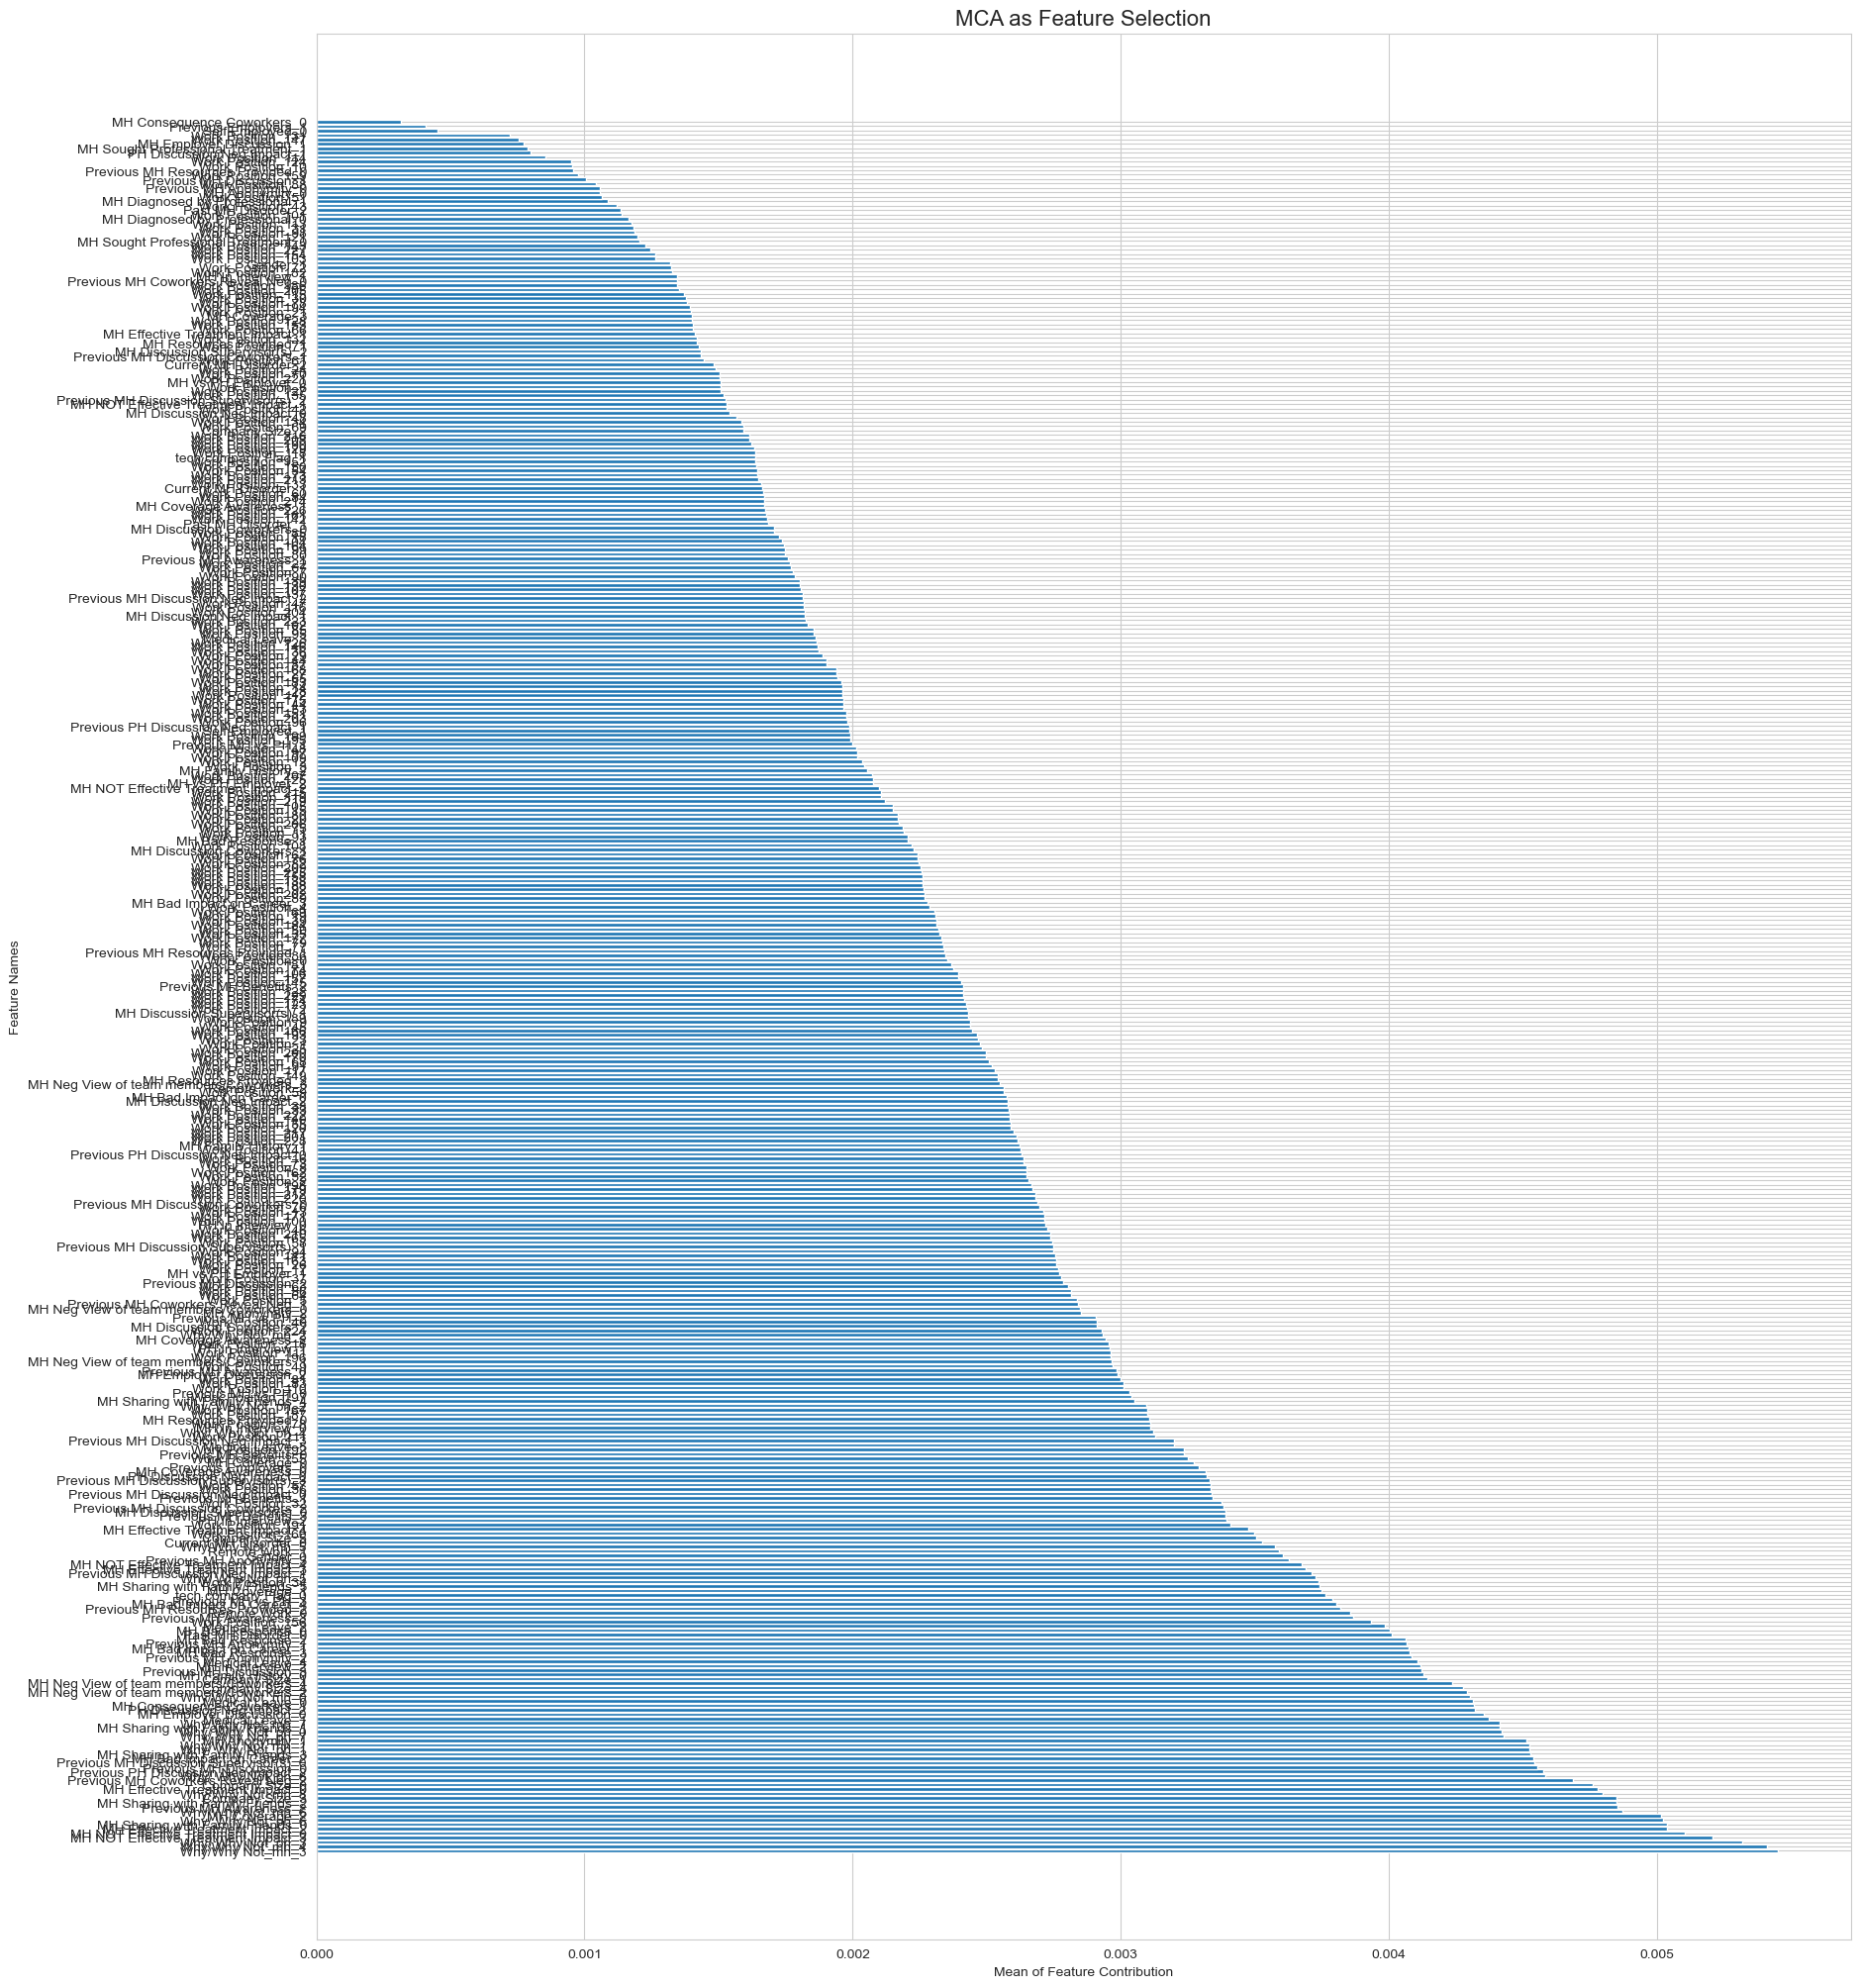

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 25))

y = features_names
x = features_values

plt.barh(y, x)

plt.ylabel("Feature Names")
plt.xlabel("Mean of Feature Contribution")
plt.title("MCA as Feature Selection", size=16)

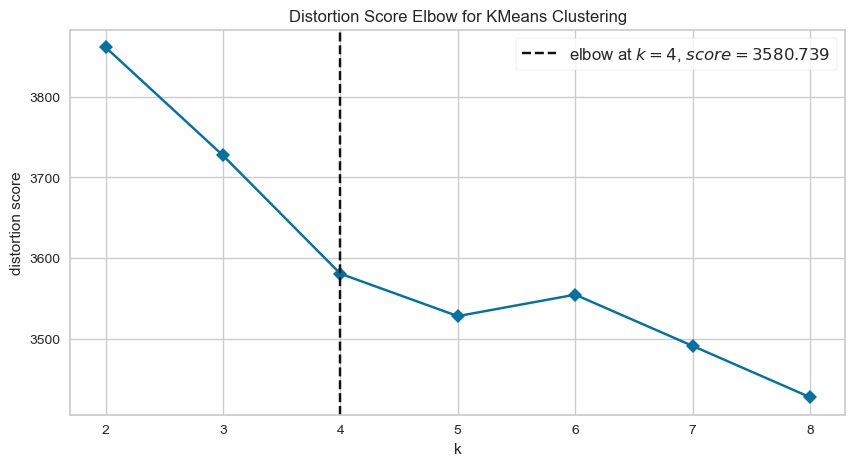

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

# create a k-Means model an Elbow-Visualizer
model = KMeans(init="k-means++", max_iter=200)

visualizer = KElbowVisualizer(model, timings=False, k=8)
# fit the visualizer and show the plot
plt.figure(figsize=(10, 5))
visualizer.fit(mca_coordinates)
visualizer.show()

In [14]:
# clustering
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto',init='k-means++', max_iter=200)
clustering = kmeans.fit_predict(mca_coordinates)


# extract centroids of clusters into a dataframe
centers = kmeans.cluster_centers_

# extract cluster labels
labels = kmeans.labels_


In [16]:
import numpy as np

cluster_characteristics = []
sizes = []

for i in range(n_clusters):
    cluster_data = mca_coordinates[labels == i]
    cluster_size = len(cluster_data)
    cluster_center = centers[i]
    avg_distance = np.mean(np.linalg.norm(cluster_data - cluster_center, axis=1))
    cluster_characteristics.append({
        "Cluster": i + 1,
        "Size": cluster_size,
        "Avg Distance": avg_distance,
    })
    sizes.append(cluster_size)

cluster_characteristics

[{'Cluster': 1, 'Size': 480, 'Avg Distance': 1.5730722639769787},
 {'Cluster': 2, 'Size': 42, 'Avg Distance': 2.124634054039307},
 {'Cluster': 3, 'Size': 682, 'Avg Distance': 1.5813514140437916},
 {'Cluster': 4, 'Size': 6, 'Avg Distance': 1.938638800358647}]

In [18]:

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
#Inertia
inertia_score = kmeans.inertia_
print("Inertia:", inertia_score)

# Silhouette Score
silhouette_avg = silhouette_score(mca_coordinates, labels)
print("Silhouette Avg:", round(silhouette_avg, 4))

# Calinski Harabasz Score
cal_score = calinski_harabasz_score(mca_coordinates, labels)
print("Calinski Harabasz Score:", round(cal_score, 1))

# Davies Bouldin Score
d_score = davies_bouldin_score(mca_coordinates, labels)
print("Davies Bouldin Score:", round(d_score, 2))

Inertia: 3685.9916605086983
Silhouette Avg: 0.0415
Calinski Harabasz Score: 20.4
Davies Bouldin Score: 3.76


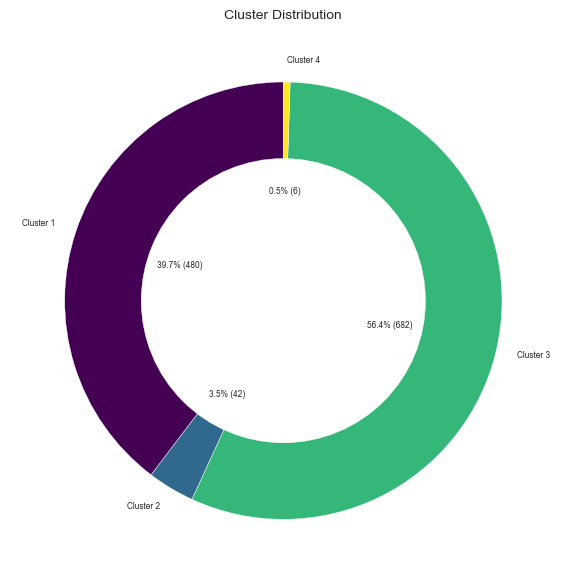

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Example sizes – replace with your actual cluster sizes
# sizes = [count1, count2, ..., countN]

cl_labels = [f'Cluster {i + 1}' for i in range(len(sizes))]

def func(val):
    a = int(np.round(val / 100. * sum(sizes)))
    return f'{round(val, 1)}% ({a})'

colors = cm.viridis(np.linspace(0, 1, len(sizes)))

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=cl_labels,
    autopct=func,
    startangle=90,
    pctdistance=0.5,  # Pull percentages inward
    colors=colors,
    textprops={'fontsize': 6}  # Very small text
)

# Donut hole (slightly smaller for more room)
centre_circle = plt.Circle((0, 0), 0.65, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Make label text small too
for text in texts:
    text.set_fontsize(6)

plt.title("Cluster Distribution", fontsize=10)
plt.tight_layout()
plt.savefig("clusters.png")
plt.show()

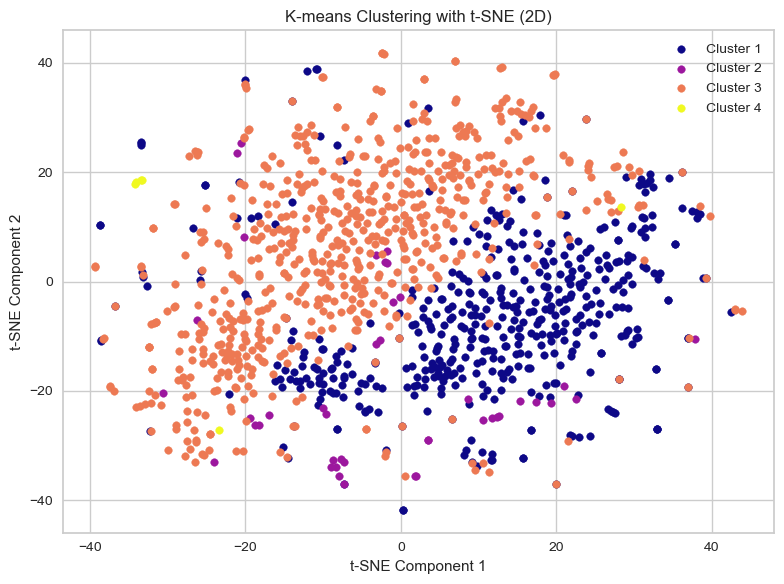

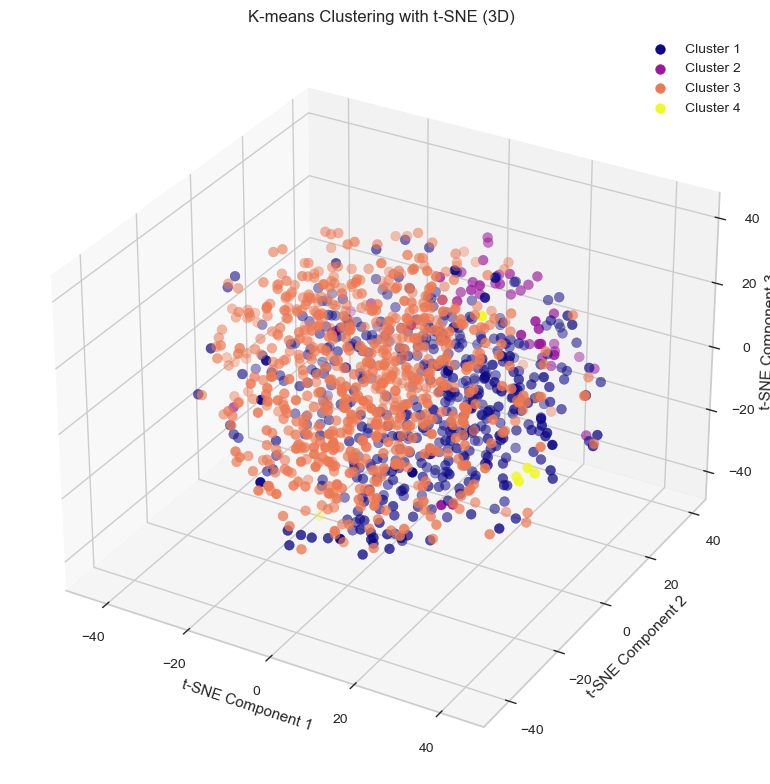

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# Assuming mca_coordinates, labels, n_clusters are already defined

# 2D t-SNE projection
tsne_2d = TSNE(n_components=2, random_state=0)
projections_2d = tsne_2d.fit_transform(mca_coordinates)

colors = cm.plasma(np.linspace(0, 1, n_clusters))

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(
        projections_2d[labels == i][:, 0],
        projections_2d[labels == i][:, 1],
        label=f'Cluster {i + 1}',
        color=colors[i],
        s=30
    )

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-means Clustering with t-SNE (2D)')
plt.legend()
plt.tight_layout()
plt.savefig("tsne_2d.png")
plt.show()


# 3D t-SNE projection
tsne_3d = TSNE(n_components=3, random_state=0)
projections_3d = tsne_3d.fit_transform(mca_coordinates)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    ax.scatter(
        projections_3d[labels == i][:, 0],
        projections_3d[labels == i][:, 1],
        projections_3d[labels == i][:, 2],
        label=f'Cluster {i + 1}',
        color=colors[i],
        s=50,
        depthshade=True
    )

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('K-means Clustering with t-SNE (3D)')
ax.legend()
plt.tight_layout()
plt.savefig("tsne_3d.png")
plt.show()

Cumulative variance explained by 6 PCs: 92.0279%


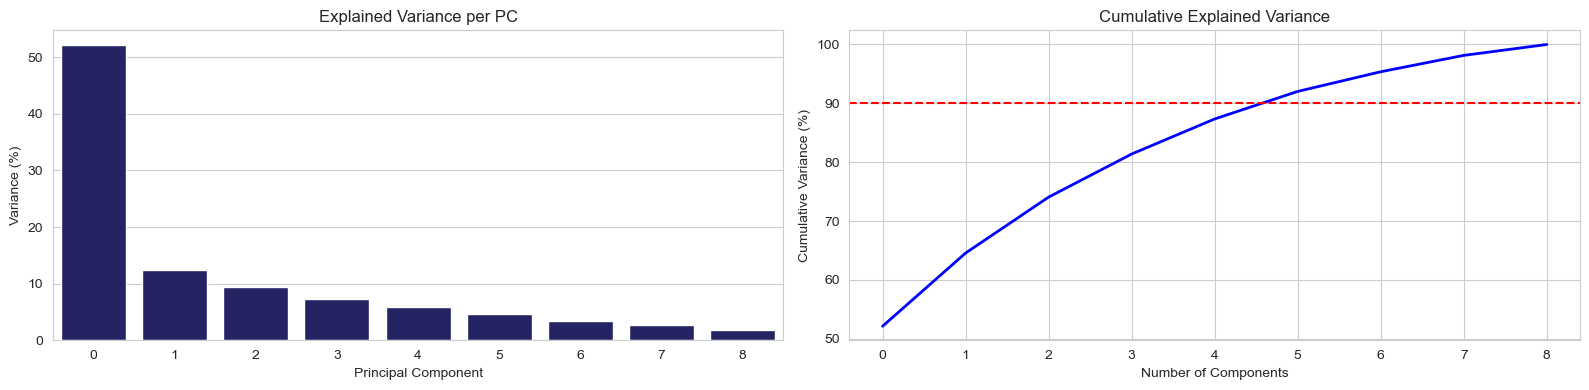

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(selected_features_df)

# Apply PCA without limiting components first
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Calculate explained variance
var_exp = pca.explained_variance_ratio_ * 100
cum_var_exp = np.cumsum(var_exp)

# Automatically select number of components to retain 90% variance
threshold = 90
optimal_components = np.argmax(cum_var_exp >= threshold) + 1
print(f"Cumulative variance explained by {optimal_components} PCs: {round(cum_var_exp[optimal_components - 1], 4)}%")

# Redo PCA with optimal number of components
pca_opt = PCA(n_components=optimal_components)
X_reduced = pca_opt.fit_transform(X_std)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(x=np.arange(len(var_exp)), y=var_exp, ax=ax[0], color='midnightblue')
ax[0].set_title("Explained Variance per PC")
ax[0].set_xlabel("Principal Component")
ax[0].set_ylabel("Variance (%)")

sns.lineplot(x=np.arange(len(cum_var_exp)), y=cum_var_exp, ax=ax[1], color='blue', linewidth=2)
ax[1].axhline(y=threshold, color='red', linestyle='--')
ax[1].set_title("Cumulative Explained Variance")
ax[1].set_xlabel("Number of Components")
ax[1].set_ylabel("Cumulative Variance (%)")
plt.tight_layout()
plt.show()

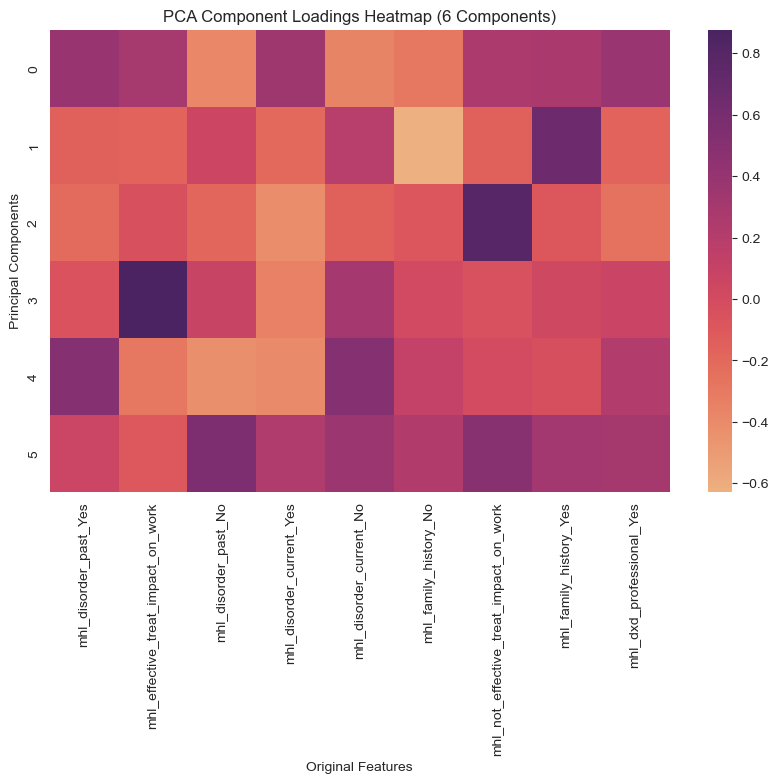

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply PCA with 6 components (since they explain ~92% variance)
pca = PCA(n_components=6)
pca_scores = pca.fit_transform(X_std)

# Create a DataFrame for the principal components (feature loadings)
df_comp = pd.DataFrame(pca.components_, columns=selected_features_df.columns)

# Plot heatmap of component loadings
plt.figure(figsize=(10, 6))
sns.heatmap(df_comp, cmap='flare', annot=False)
plt.title("PCA Component Loadings Heatmap (6 Components)")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()

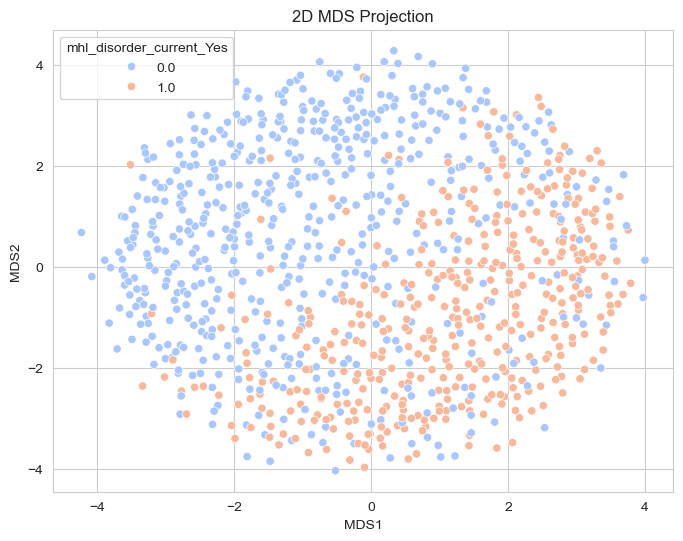

In [4]:
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Separate target and features
y = encoded_df["mhl_disorder_current_Yes"]
X = encoded_df.drop(columns=["mhl_disorder_current_Yes"])

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply MDS to reduce to 2 dimensions
mds = MDS(n_components=2, random_state=0)
X_2d = mds.fit_transform(X_scaled)

# Create a DataFrame for easier plotting
mds_df = pd.DataFrame(X_2d, columns=["MDS1", "MDS2"])
mds_df["Target"] = y.values

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mds_df, x="MDS1", y="MDS2", hue="Target", palette="coolwarm")
plt.title("2D MDS Projection")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.legend(title="mhl_disorder_current_Yes")
plt.show()

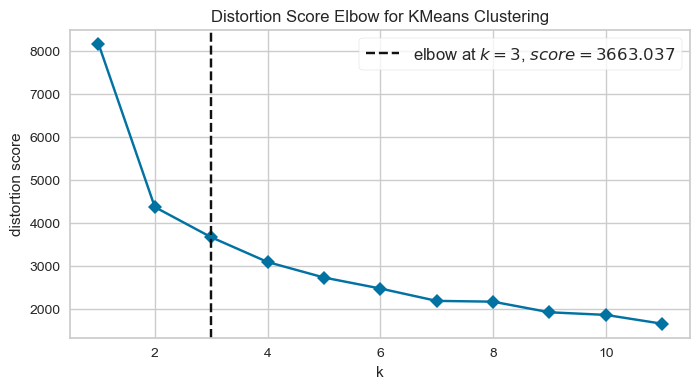

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(8,4))

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12), timings=False)

visualizer.fit(pca_scores)   # Fit the data to the visualizer
visualizer.show()            # Finalize and render the figure

In [8]:
# Initiate K-means clustering
kmeans_pca = KMeans(n_clusters = 3, init="k-means++")
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=3)

In [9]:
# Initiate K-means clustering
kmeans_pca = KMeans(n_clusters = 3, init="k-means++")
kmeans_pca.fit(X_reduced)

KMeans(n_clusters=3)

In [12]:
# Concatinate cleaned dataframe (before encoding) to pca results
df_segm_pca_kmeans = pd.concat([df.reset_index(drop=True),pd.DataFrame(X_reduced)],axis=1)

# Rename Columns
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']

# The Last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [13]:
df_segm_pca_kmeans.head()

,company_size,tech_comp_flag,tech_role_flag,mhl_coverage_flag,mhl_coverage_awareness_flag,mhl_employer_discussion_flag,mhl_resources_provided_flag,mhl_anonymity_flag,mhl_sick_leave,mhl_discussion_neg_impact,...,work_position,remote_flag,lead_position,0,1,2,Component 1,Component 2,Component 3,Segment K-means PCA
0,26-100,Yes,Yes,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,Back-end Developer,Sometimes,No,-0.964792,-1.169074,-1.012407,-0.040880,2.409132,-0.171218,0
1,6-25,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Back-end Developer|Front-end Developer,Never,No,2.734513,0.079821,0.465376,-0.195749,-0.130408,0.841275,1
2,6-25,Yes,Yes,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,...,Back-end Developer,Always,No,-2.497293,-0.534215,-0.068605,-0.080342,0.941185,-0.905095,0
3,6-25,No,Yes,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes,Yes,2.945090,-0.040354,0.438240,0.430417,-0.334058,0.772877,1
4,More than 1000,Yes,Yes,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes,No,-1.645179,-1.340646,-0.290292,-1.290213,-1.823087,0.454621,0


In [14]:
# Create new column with logical naming
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map(
    {0:'First',
    1: 'Second',
    })

In [15]:
df_segm_pca_kmeans.head()

,company_size,tech_comp_flag,tech_role_flag,mhl_coverage_flag,mhl_coverage_awareness_flag,mhl_employer_discussion_flag,mhl_resources_provided_flag,mhl_anonymity_flag,mhl_sick_leave,mhl_discussion_neg_impact,...,remote_flag,lead_position,0,1,2,Component 1,Component 2,Component 3,Segment K-means PCA,Segment
0,26-100,Yes,Yes,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,Sometimes,No,-0.964792,-1.169074,-1.012407,-0.040880,2.409132,-0.171218,0,First
1,6-25,Yes,Yes,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Never,No,2.734513,0.079821,0.465376,-0.195749,-0.130408,0.841275,1,Second
2,6-25,Yes,Yes,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,...,Always,No,-2.497293,-0.534215,-0.068605,-0.080342,0.941185,-0.905095,0,First
3,6-25,No,Yes,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Yes,2.945090,-0.040354,0.438240,0.430417,-0.334058,0.772877,1,Second
4,More than 1000,Yes,Yes,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,Sometimes,No,-1.645179,-1.340646,-0.290292,-1.290213,-1.823087,0.454621,0,First


/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_1162/428928346.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Text(0.5, 0, 'Component 3')

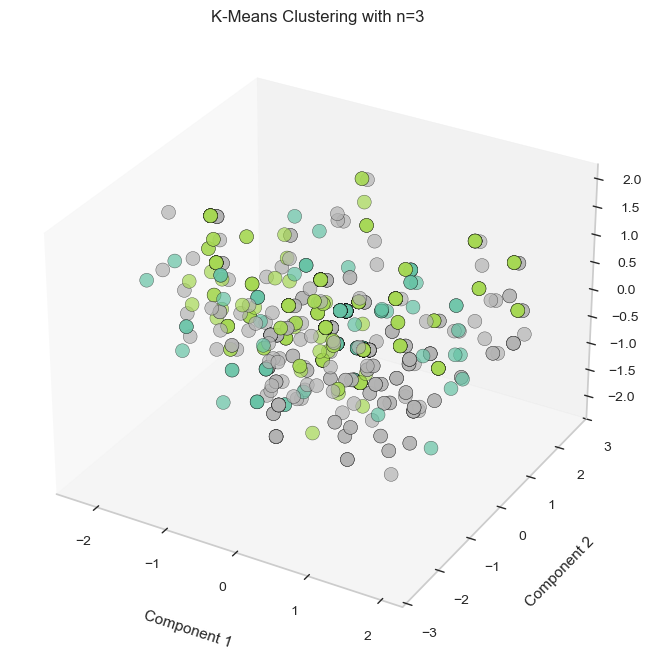

In [16]:
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.pyplot as plt

# Fix X,Y,Z values based on PC
Xax = df_segm_pca_kmeans['Component 1']
Yax = df_segm_pca_kmeans['Component 2']
Zax = df_segm_pca_kmeans['Component 3']

# Create plot
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
cmap = ListedColormap(sns.color_palette("Set2"))
ax.scatter(Xax, Yax, Zax, c= df_segm_pca_kmeans["Segment K-means PCA"], cmap=cmap, edgecolor='k', s=100, alpha = 0.7)

# Add title
ax.grid(False)
ax.legend()
ax.set_title('K-Means Clustering with n=3')
ax.set_xlabel('Component 1', labelpad=20)
ax.set_ylabel('Component 2', labelpad=20)
ax.set_zlabel('Component 3', labelpad=20)

In [5]:
import os

# Create the directory named 'processed_data' if it doesn't exist
os.makedirs('processed_data', exist_ok=True)

# Save the selected features CSV inside the 'processed_data' folder
selected_features_df.to_csv('processed_data/pca_score.csv', index=False)
